In [1]:
import keras
import sys
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, decode_predictions
#from skimage import transform,io
import numpy as np
from keras import regularizers
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score
base_model = ResNet50(weights='imagenet', include_top=False, pooling='max')

'''
#model.summary()
img_path = 'elephant.jpg'
x = io.imread(img_path)
x = transform.resize(x,(224,224,3))
print (x[5][5][0])
print (x[5][5][1])
print (x[5][5][2])
print(x.dtype.name)

'''

'''
x= img_as_ubyte(x)
print (x[5][5][0])
print (x[5][5][1])
print (x[5][5][2])
print(x.dtype.name)

x = x.astype(np.float32)
print(x.dtype.name)
print (x.shape)
#io.imshow(x)
x = np.expand_dims(x, axis=0)
print (x.shape)
x = preprocess_input(x)
'''


Using TensorFlow backend.


'\nx= img_as_ubyte(x)\nprint (x[5][5][0])\nprint (x[5][5][1])\nprint (x[5][5][2])\nprint(x.dtype.name)\n\nx = x.astype(np.float32)\nprint(x.dtype.name)\nprint (x.shape)\n#io.imshow(x)\nx = np.expand_dims(x, axis=0)\nprint (x.shape)\nx = preprocess_input(x)\n'

In [2]:
'''
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    plt.figure()
    plt.plot(epochs, loss, 'r.')
    plt.plot(epochs, val_loss, 'r-')
    plt.title('Training and validation loss')
    plt.show()
'''

"\ndef plot_training(history):\n    acc = history.history['acc']\n    val_acc = history.history['val_acc']\n    loss = history.history['loss']\n    val_loss = history.history['val_loss']\n    epochs = range(len(acc))\n\n    plt.plot(epochs, acc, 'r.')\n    plt.plot(epochs, val_acc, 'r')\n    plt.title('Training and validation accuracy')\n\n    plt.figure()\n    plt.plot(epochs, loss, 'r.')\n    plt.plot(epochs, val_loss, 'r-')\n    plt.title('Training and validation loss')\n    plt.show()\n"

In [3]:
'''
FC_SIZE = 1024
NUMCLASSES = 2
x = base_model.output
x = Dense(FC_SIZE, activation='relu')(x)
predictions = Dense(NUMCLASSES , activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
'''

"\nFC_SIZE = 1024\nNUMCLASSES = 2\nx = base_model.output\nx = Dense(FC_SIZE, activation='relu')(x)\npredictions = Dense(NUMCLASSES , activation='softmax')(x)\nmodel = Model(inputs=base_model.input, outputs=predictions)\n\nfor layer in base_model.layers:\n    layer.trainable = False\n\nmodel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])\n"

In [4]:
FC_SIZE_1 = 256
#FC_SIZE_2 = 32


NUMCLASSES = 2

x = base_model.output
x = Dense(FC_SIZE_1, activation='relu',kernel_regularizer=regularizers.l2(0.01))(x) #kernel_regularizer=regularizers.l2(0.1)
x = Dropout(0.4)(x)
#x = Dense(FC_SIZE_2, activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
predictions = Dense(NUMCLASSES , activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

print(len(base_model.layers))

for layer in base_model.layers:
    layer.trainable = False
#for layer in base_model.layers[165:]:
#    layer.trainable = True

model.summary()
adam = keras.optimizers.Adam()
    #lr=0.0005, 
    #decay=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

175
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 6 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_po

In [5]:
train_datagen =  ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.2,
    zoom_range=[0.5,1],
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [6]:
'''
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(
            self.validation_data[0])))
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        return
metrics = Metrics()
'''

'\nclass Metrics(Callback):\n    def on_train_begin(self, logs={}):\n        self.val_f1s = []\n        self.val_recalls = []\n        self.val_precisions = []\n\n    def on_epoch_end(self, epoch, logs={}):\n        val_predict = (np.asarray(self.model.predict(\n            self.validation_data[0])))\n        val_targ = self.validation_data[1]\n        _val_f1 = f1_score(val_targ, val_predict)\n        _val_recall = recall_score(val_targ, val_predict)\n        _val_precision = precision_score(val_targ, val_predict)\n        self.val_f1s.append(_val_f1)\n        self.val_recalls.append(_val_recall)\n        self.val_precisions.append(_val_precision)\n        return\nmetrics = Metrics()\n'

In [7]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224),
    batch_size=256,
    save_to_dir = 'train_g',
    save_format='jpeg',
    shuffle=True)
validation_generator = test_datagen.flow_from_directory(
    'validation',
    target_size=(224, 224),
    batch_size=128,
    shuffle=True)



    
history = model.fit_generator(
    train_generator,
    epochs=40,
    validation_data=validation_generator)
# with open('log10.txt','a') as f:
#     f.write("\n")
#     f.write(str(history.history))
#     f.write("\n")
#     f.write(str(metrics))
# model.save('my_model_5.h5')
#plot_training(history)

Found 1093 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
Epoch 1/40


D:\Anaconda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


5/5 [==============================] - 22s 4s/step - loss: 4.8345 - acc: 0.7940 - val_loss: 4.2907 - val_acc: 0.9545
Epoch 2/40
5/5 [==============================] - 21s 4s/step - loss: 4.0943 - acc: 0.9675 - val_loss: 3.9125 - val_acc: 0.9545
Epoch 3/40
5/5 [==============================] - 21s 4s/step - loss: 3.5500 - acc: 0.9780 - val_loss: 3.4255 - val_acc: 0.9545
Epoch 4/40
5/5 [==============================] - 21s 4s/step - loss: 3.0856 - acc: 0.9838 - val_loss: 2.9708 - val_acc: 0.9545
Epoch 5/40
5/5 [==============================] - 20s 4s/step - loss: 2.6502 - acc: 0.9920 - val_loss: 2.6414 - val_acc: 0.9470
Epoch 6/40
5/5 [==============================] - 21s 4s/step - loss: 2.2623 - acc: 0.9920 - val_loss: 2.2250 - val_acc: 0.9545
Epoch 7/40
5/5 [==============================] - 21s 4s/step - loss: 1.9414 - acc: 0.9920 - val_loss: 1.9225 - val_acc: 0.9545
Epoch 8/40
5/5 [==============================] - 21s 4s/step - loss: 1.6709 - acc: 0.9838 - val_loss: 1.6789 - val

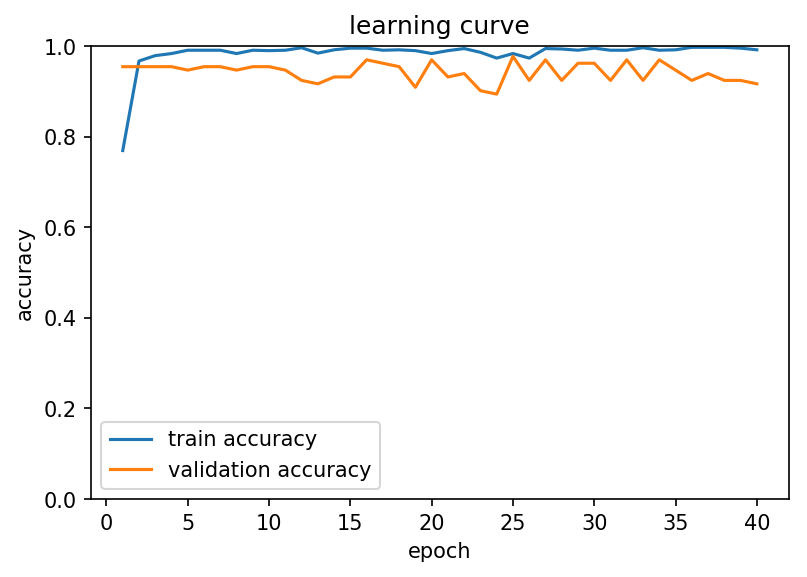

In [8]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
x_acc = range(1, len(acc)+1)
x_val_acc = range(1, len(val_acc)+1)
plt.figure(dpi=150)
l1, = plt.plot(x_acc, acc)
l2, = plt.plot(x_val_acc, val_acc)
plt.legend(handles=[l1, l2], labels=['train accuracy', 'validation accuracy'], loc='best')
plt.ylim(0,1)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("learning curve")
plt.savefig ("8.jpg", dpi=150)
plt.show()